In [25]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [27]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/Users/amoakoheskey/Desktop/CS50/10_ML_projects/Brain-tumor/datasets',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(64,64),
    batch_size=(16),
)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/Users/amoakoheskey/Desktop/CS50/10_ML_projects/Brain-tumor/datasets',
    image_size=(64,64),
    batch_size=(16),
)




Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.


In [28]:
def preprocess(image,label):
    image = tf.cast(image,tf.float32)
    image = image/255
    return image,label

train_dataset = train_dataset.map(preprocess)
# validation_dataset = test_dataset.map(preprocess)
test_dataset = test_dataset.map(preprocess)

In [29]:
model = tf.keras.models.Sequential([
    # tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='softmax'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [31]:
history = model.fit(train_dataset,epochs=25)

Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7050 - loss: 0.6804
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6356 - loss: 0.6696
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5940 - loss: 0.6783
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5550 - loss: 0.6796
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6369 - loss: 0.6569
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5881 - loss: 0.6610
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6086 - loss: 0.6604
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6253 - loss: 0.6429
Epoch 9/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6102 - loss: 0.6259
Epoch 10/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6226 - loss: 0.6291
Epoch 11/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5959 - loss: 0.6327
Epoch 12/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy:

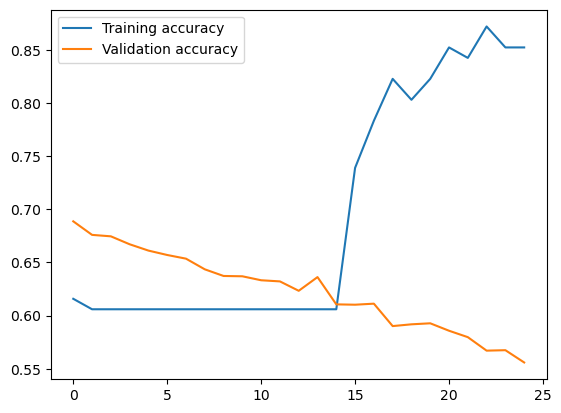

In [33]:
plt.plot(history.history['accuracy'],label = 'Training accuracy')
plt.plot(history.history['loss'],label = 'Validation accuracy')
plt.legend()
plt.show()

In [34]:
history.params

{'verbose': 'auto', 'epochs': 25, 'steps': 13}

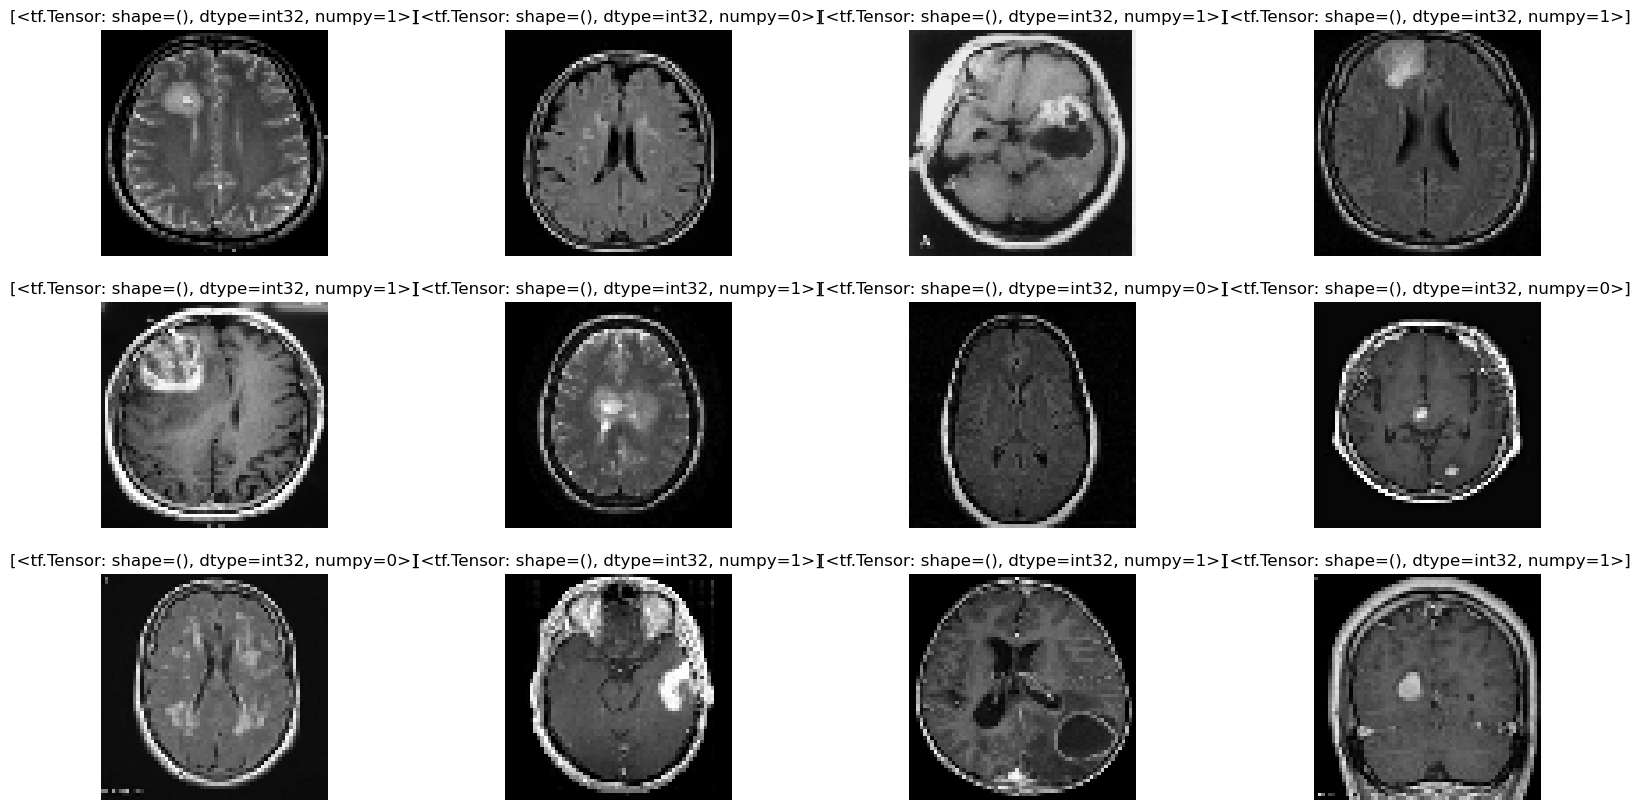

In [35]:
plt.figure(figsize=(20,10))
# for image_batch,label_batch in train_dataset.take(1):
image_batch,label_batch = next(iter(train_dataset)) 
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i])
    plt.title([label_batch[i]])
    plt.axis('off')
plt.show()

In [ ]:
y_